# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import  mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

# DATA IMPORTING

In [3]:
data = pd.read_csv('concrete_data.csv')
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# CORRELATING HIGHLY DEPENDENT FEATURES

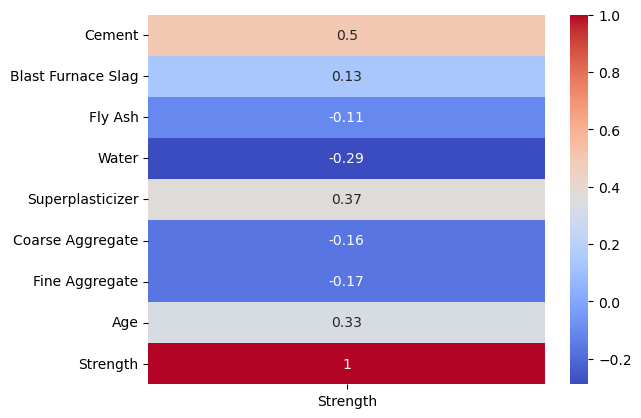

In [4]:
sns.heatmap(data.corr()['Strength'].to_frame(),cmap='coolwarm',annot=True)
pyp.show()

# ANALYSING LABEL

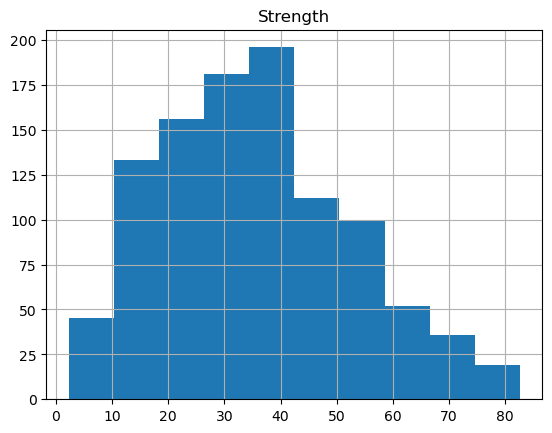

In [5]:
data.hist('Strength')
pyp.show()

# DISTRIBUTION OF LABEL

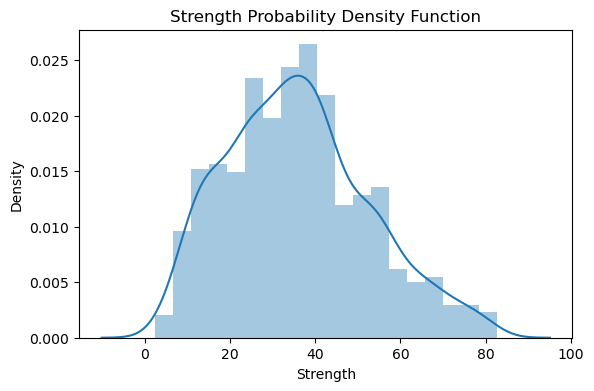

In [6]:
pyp.figure(figsize=(14,4))
pyp.subplot(121)
sns.distplot(data['Strength'])
pyp.title('Strength Probability Density Function')
pyp.show()

# RELATION OF DATA POINTS WITH NORMAL DISTRIBUTION

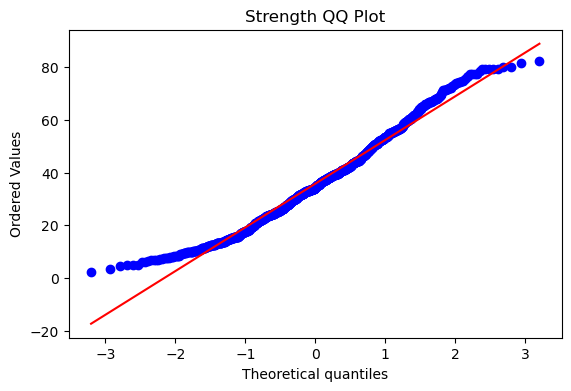

In [7]:
pyp.figure(figsize=(14,4))
pyp.subplot(121)
stats.probplot(data['Strength'],dist='norm',plot=pyp)
pyp.title('Strength QQ Plot')

pyp.show()

# ANALYSING ON DEPENDENT FEATURES

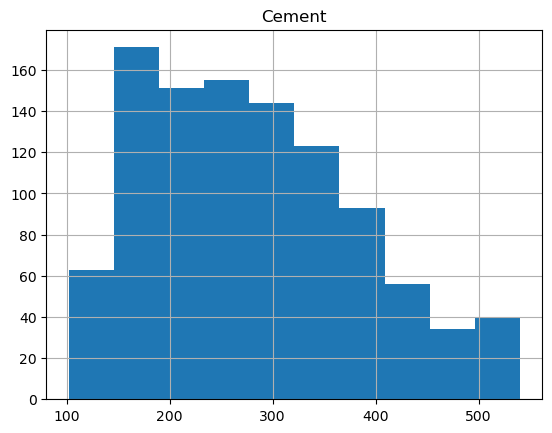

In [8]:
data.hist('Cement')
pyp.show()

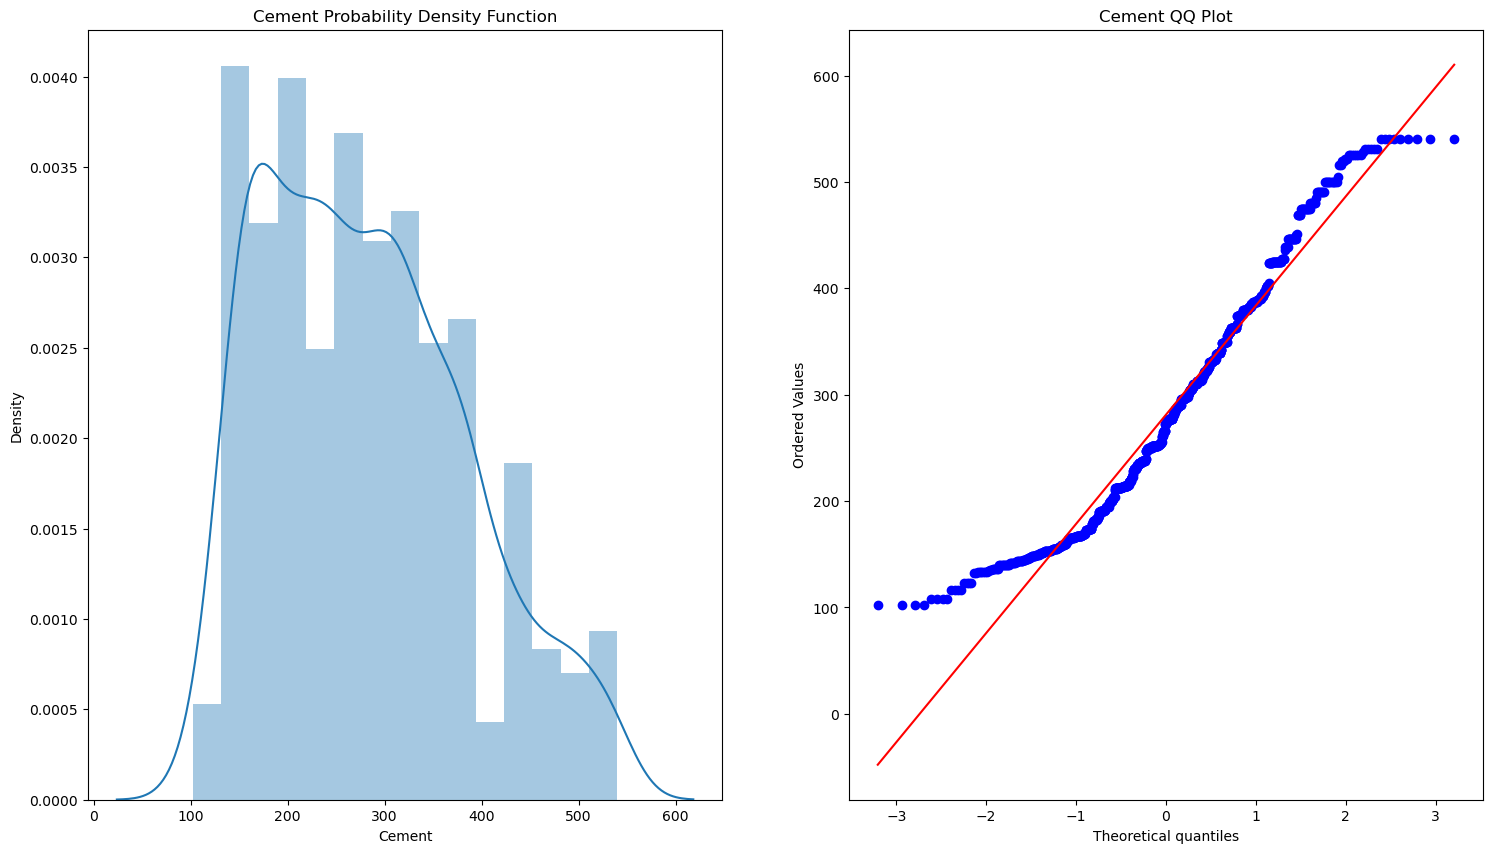

In [9]:
pyp.figure(figsize=(18,10))
pyp.subplot(121)
sns.distplot(data['Cement'])
pyp.title('Cement Probability Density Function')

pyp.subplot(122)
stats.probplot(data['Cement'],dist='norm',plot=pyp)
pyp.title('Cement QQ Plot')

pyp.show()

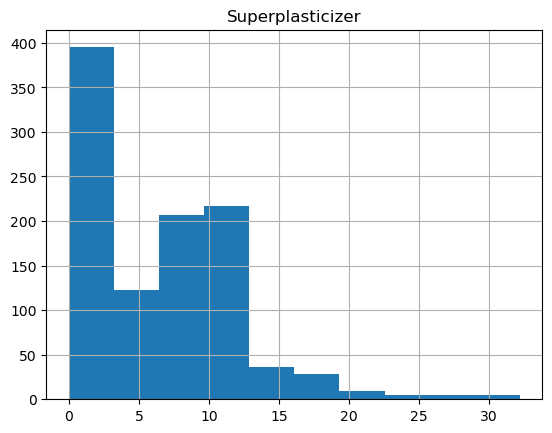

In [10]:
data.hist('Superplasticizer')
pyp.show()

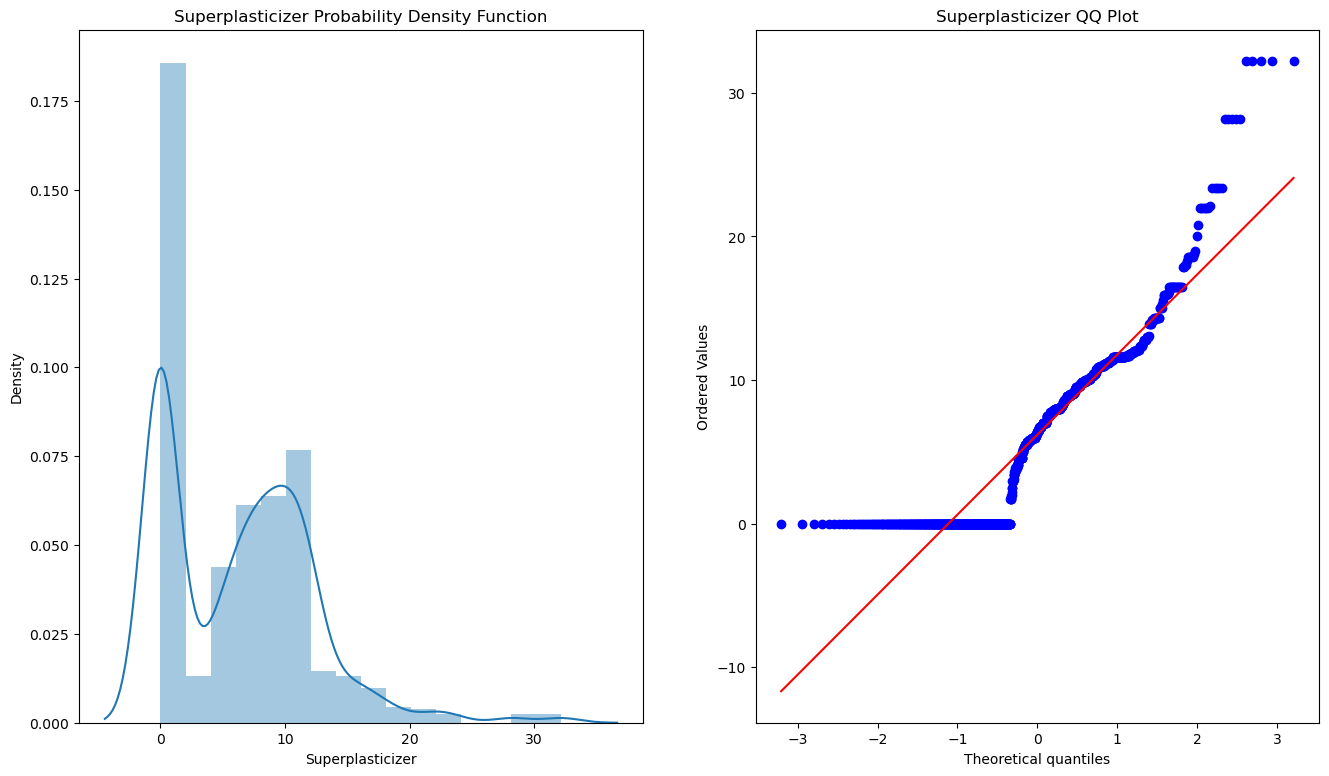

In [11]:
pyp.figure(figsize=(16,9))
pyp.subplot(121)
sns.distplot(data['Superplasticizer'])
pyp.title('Superplasticizer Probability Density Function')

pyp.subplot(122)
stats.probplot(data['Superplasticizer'],dist='norm',plot=pyp)
pyp.title('Superplasticizer QQ Plot')

pyp.show()

In [12]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [13]:
data.Age.value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64

In [14]:
hold = data[data['Age']>99]['Age'].index

In [15]:
len(hold)

114

In [16]:
for i in hold:
    temp = str(data.loc[i,'Age'])
    data.loc[i,'Age'] = int(temp[:-1])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [18]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,27,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,36,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,36,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [19]:
data.Age.value_counts()

28    425
3     134
7     126
56     91
14     62
90     54
10     52
18     26
91     22
36     20
27     13
12      3
1       2
Name: Age, dtype: int64

In [20]:
data[data['Age']<=10]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
22,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,3,8.06
29,475.0,0.0,0.0,228.0,0.0,932.0,594.0,7,38.60
45,427.5,47.5,0.0,228.0,0.0,932.0,594.0,7,35.08
46,349.0,0.0,0.0,192.0,0.0,1047.0,806.9,3,15.05
48,237.5,237.5,0.0,228.0,0.0,932.0,594.0,7,26.26
...,...,...,...,...,...,...,...,...,...
810,310.0,0.0,0.0,192.0,0.0,970.0,850.0,7,14.99
815,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,3,33.80
816,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,7,42.42
826,480.0,0.0,0.0,192.0,0.0,936.0,721.0,3,24.39


In [21]:
len(data)

1030

In [22]:
data[data['Age']<=10]['Superplasticizer'].unique()

array([ 0. , 10.1,  8.6, 16.5, 18.6, 23.4,  8.9, 32.2, 12.1, 28.2, 14.3,
       11.4, 11.6, 10.3, 15.9, 11.2, 11.1, 22. ,  9.5,  4.5,  4.6,  7.5,
        7.8,  5.7,  9.9,  6.9,  6.7,  6.1,  7. ,  5.5,  8.7, 10.4,  5.8,
        6.4,  7.6,  8.2, 10.8,  9.4, 11.8, 12.4, 12.8, 14.2, 12. , 10.2,
       11.7, 11.9,  9.6, 11.3,  8.1,  3.6,  4.1,  6.5,  7.9,  9.7,  5.3,
       13.9,  3.9,  8.5,  1.7, 10.9])

In [23]:
data['Superplasticizer'].value_counts(bins=3)

(-0.0332, 10.733]    793
(10.733, 21.467]     215
(21.467, 32.2]        22
Name: Superplasticizer, dtype: int64

In [24]:
data.loc[data['Age'] <= 10, 'Age'] = data[data['Age'] <= 10]['Age'] + 10

In [25]:
data['Age'].value_counts()

28    425
13    134
17    126
56     91
14     62
90     54
20     52
18     26
91     22
36     20
27     13
12      3
11      2
Name: Age, dtype: int64

In [26]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,27,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,36,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,36,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


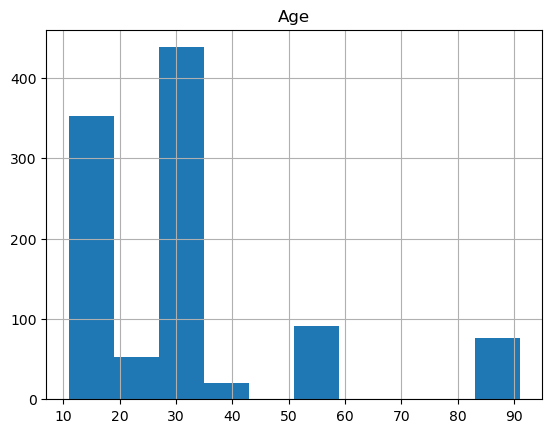

In [27]:
data.hist('Age')
pyp.show()

In [28]:
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,27,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,36,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,36,44.30


In [29]:
x = data[['Cement','Superplasticizer','Age']]
x

,Cement,Superplasticizer,Age
0,540.0,2.5,28
1,540.0,2.5,28
2,332.5,0.0,27
3,332.5,0.0,36
4,198.6,0.0,36
...,...,...,...
1025,276.4,8.9,28
1026,322.2,10.4,28
1027,148.5,6.1,28
1028,159.1,11.3,28


In [30]:
y = data['Strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

# TRAINING MODEL

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
l_reg = LinearRegression()

In [33]:
l_reg.fit(xtrain,ytrain)

LinearRegression()

In [34]:
pred = l_reg.predict(xtest)

In [35]:
mean_squared_error(ytest,pred)

135.85191393045255

# EFFICIENCY OF TRAINED MODEL

In [36]:
mse = mean_squared_error(ytest,pred)
mean_y = y.mean()
r_squared = 1 - (mse / (mean_y ** 2))
print("Efficiency:", str(round(r_squared*100,2))+'%')

Efficiency: 89.41%


# STANDARDISING FEATURES AND LABEL TO GET MORE EFFICIENCY

In [37]:
data['log_cement'] = np.log2(data['Cement'])

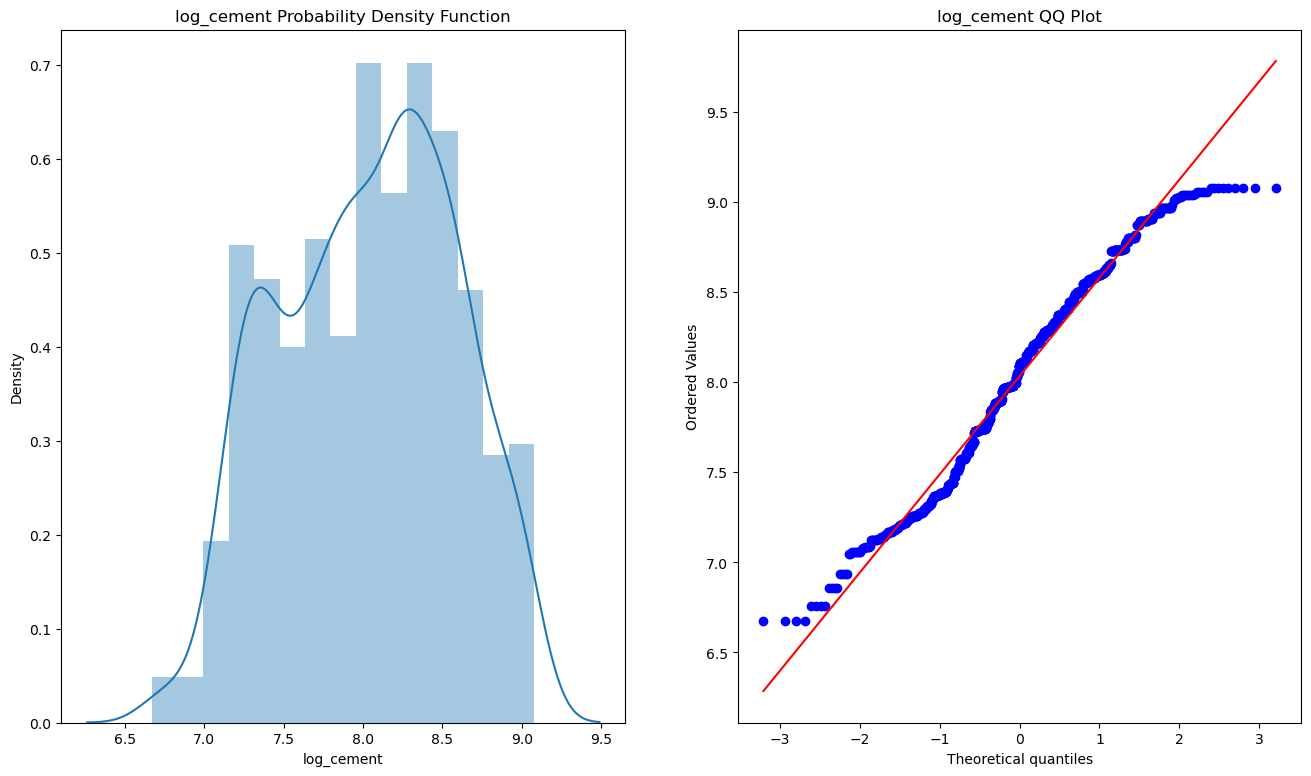

In [38]:
pyp.figure(figsize=(16,9))
pyp.subplot(121)
sns.distplot(data['log_cement'])
pyp.title('log_cement Probability Density Function')

pyp.subplot(122)
stats.probplot(data['log_cement'],dist='norm',plot=pyp)
pyp.title('log_cement QQ Plot')

pyp.show()

In [57]:
data.drop(data[data['Superplasticizer'] == 0].index,axis=0,inplace=True)

In [58]:
data['log_superplasticizer'] = np.log2(data['Superplasticizer'])

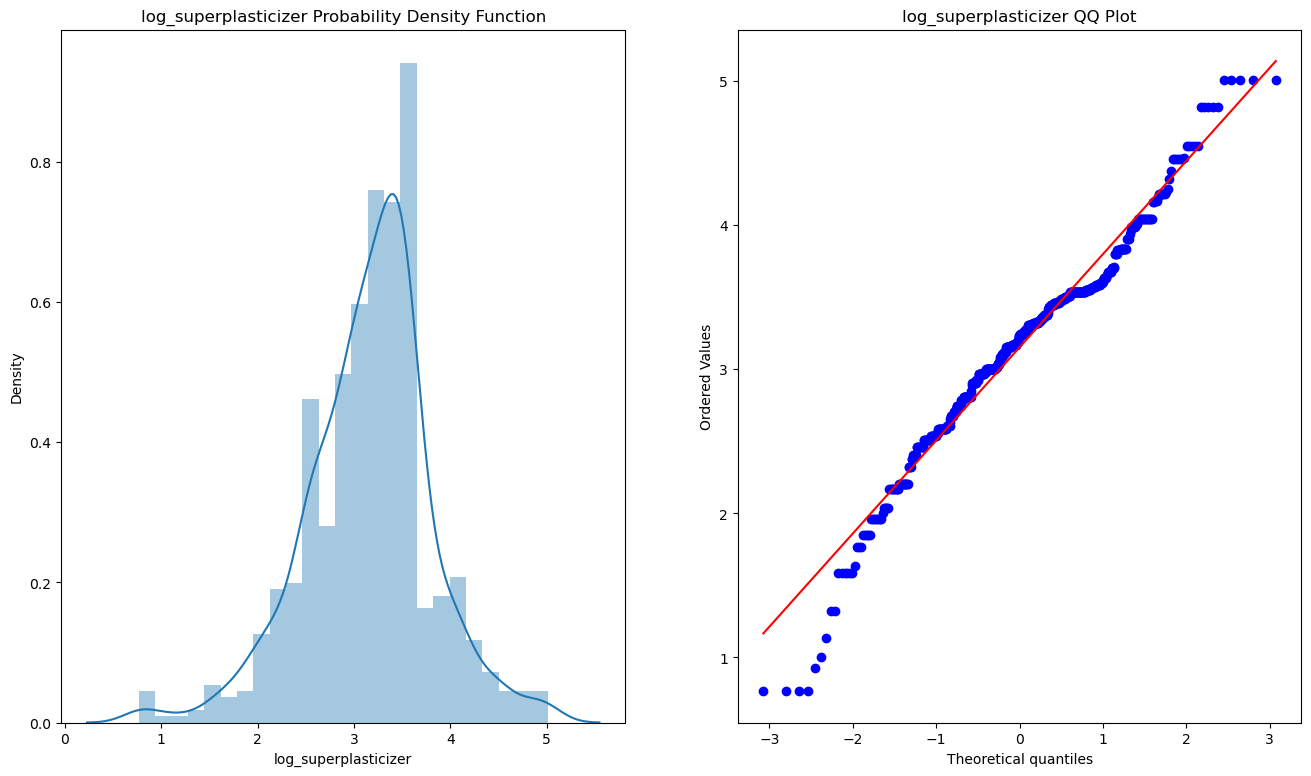

In [59]:
pyp.figure(figsize=(16,9))
pyp.subplot(121)
sns.distplot(data['log_superplasticizer'])
pyp.title('log_superplasticizer Probability Density Function')

pyp.subplot(122)
stats.probplot(data['log_superplasticizer'],dist='norm',plot=pyp)
pyp.title('log_superplasticizer QQ Plot')

pyp.show()

In [61]:
data['log_age'] = np.log2(data['Age'])

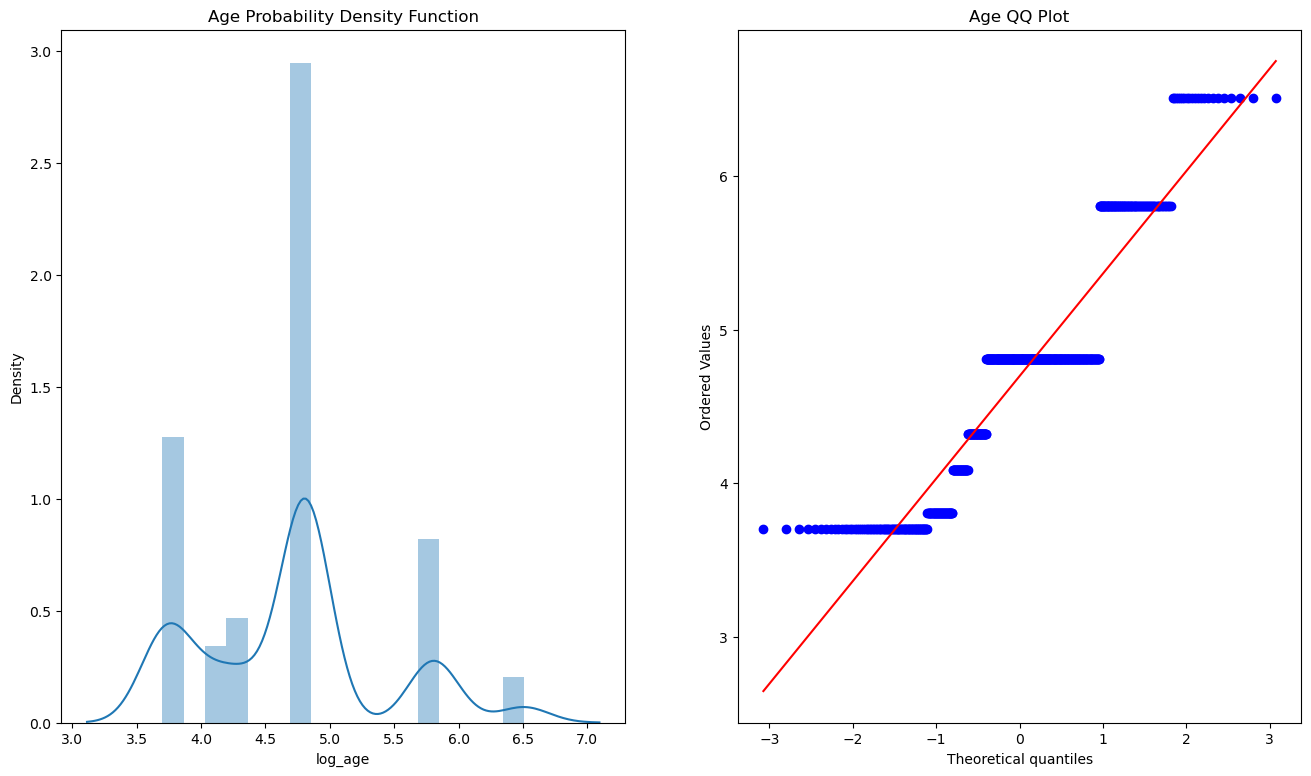

In [62]:
pyp.figure(figsize=(16,9))
pyp.subplot(121)
sns.distplot(data['log_age'])
pyp.title('Age Probability Density Function')

pyp.subplot(122)
stats.probplot(data['log_age'],dist='norm',plot=pyp)
pyp.title('Age QQ Plot')

pyp.show()

In [63]:
x = data[['log_cement','log_superplasticizer','log_age']]
x

,log_cement,log_superplasticizer,log_age
0,9.076816,1.321928,4.807355
1,9.076816,1.321928,4.807355
70,8.546894,3.336283,3.700440
71,8.291401,3.104337,3.700440
72,8.731319,4.044394,3.700440
...,...,...,...
1025,8.110614,3.153805,4.807355
1026,8.331813,3.378512,4.807355
1027,7.214319,2.608809,4.807355
1028,7.313790,3.498251,4.807355


In [64]:
y = data['Strength']
y

0       79.99
1       61.89
70      34.40
71      28.80
72      33.40
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 651, dtype: float64

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
insurance_model = LinearRegression()

In [67]:
insurance_model.fit(xtrain, ytrain)

LinearRegression()

In [73]:
ypred = insurance_model.predict(xtrain)

In [74]:
mean_squared_error(ytrain, ypred)

119.04129998306546

In [75]:
mse = mean_squared_error(ytrain,ypred)
mean_y = y.mean()
r_squared = 1 - (mse / (mean_y ** 2))
print("Efficiency:", str(round(r_squared*100,2))+'%')

Efficiency: 92.36%
